### Viz 0: upload and unzip `outputs.tar.gz`

In [ ]:
!tar -xzvf outputs.tar.gz

### Viz 1: import modules

In [ ]:
import pandas as pd 

### plotting
import matplotlib.pyplot as plt

### Viz 3: show traveler traces.

In [ ]:
### not completed: output should be individual agents, not aggregated
agent_id = 11
for t in range(26664-200, 30700, 20):
    traveler_locations = pd.read_csv('outputs/traveler_outputs/traveler_outputs_od100_{}.csv'.format(t))
    if traveler_locations.shape[0]>0:
      print(t)
      display(traveler_locations)
      #break

### Viz 4: show platform crowdness.

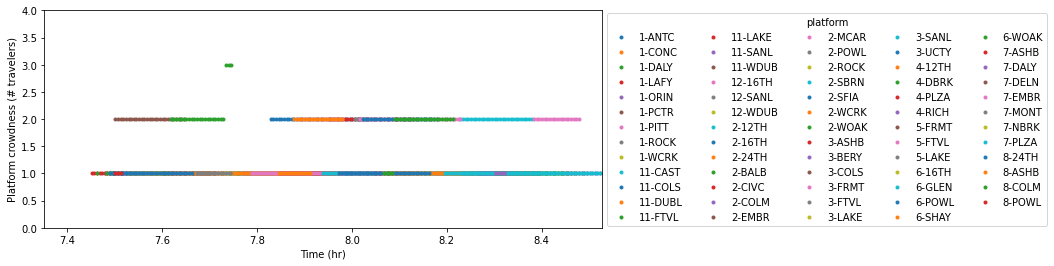

In [3]:
platform_crowdness = []
for t in range(26664-200, 30700, 20):
    traveler_locations = pd.read_csv('outputs/traveler_outputs/traveler_outputs_od100_{}.csv'.format(t))
    traveler_locations['time'] = t
    platform_crowdness += traveler_locations[traveler_locations['traveler_status']=='platform'].values.tolist()
platform_crowdness = pd.DataFrame(platform_crowdness, 
                                  columns=['traveler_status', 'platform_name', 'num_travelers', 'time'])

fig, ax = plt.subplots(figsize=(10, 4))
for platform_name, grp in platform_crowdness.groupby('platform_name'):
    ax.plot(grp['time']/3600, grp['num_travelers'], '.', label=platform_name)
ax.set_xlim([(26664-200)/3600, 30700/3600])
ax.set_ylim([0, 4])
ax.set_xlabel('Time (hr)')
ax.set_ylabel('Platform crowdness (# travelers)')
fig.legend(ncol=5, bbox_to_anchor=(0.9, 0.5), loc='center left', title='platform')
plt.savefig('images/example_crowdness.png', dpi=200)

### Step 5. train occupancy

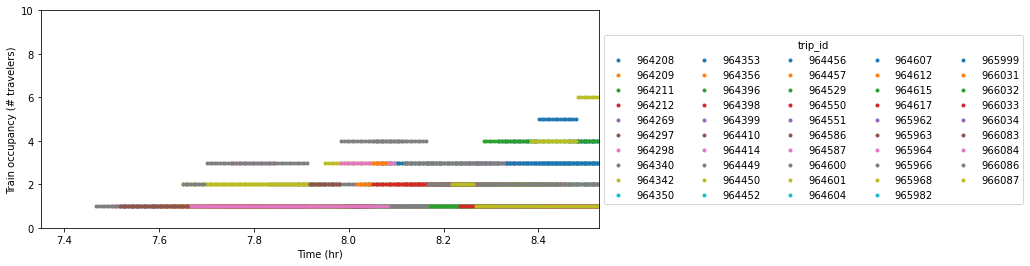

In [4]:
train_occupancy = []
for t in range(26664-200, 30700, 20):
    traveler_locations = pd.read_csv('outputs/traveler_outputs/traveler_outputs_od100_{}.csv'.format(t))
    traveler_locations['time'] = t
    train_occupancy += traveler_locations[traveler_locations['traveler_status']=='train'].values.tolist()
train_occupancy = pd.DataFrame(train_occupancy, 
                               columns=['traveler_status', 'trip_id', 'num_travelers', 'time'])


fig, ax = plt.subplots(figsize=(10, 4))
for trip_id, grp in train_occupancy.groupby('trip_id'):
    ax.plot(grp['time']/3600, grp['num_travelers'], '.', label=trip_id)
ax.set_xlim([(26664-200)/3600, 30700/3600])
ax.set_ylim([0, 10])
ax.set_xlabel('Time (hr)')
ax.set_ylabel('Train occupancy (# travelers)')
fig.legend(ncol=5, bbox_to_anchor=(0.9, 0.5), loc='center left', title='trip_id')
plt.savefig('images/example_train_occupancy.png', dpi=200)